# Filter Research
## Dr. Larson
## Grace Eliason
## Spring 2017

In [26]:
## End goal: Maximize magnitude of stars at specific temperatures through different filters

## import all the nice things we're using for our plots and maths

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy import interpolate 
%matplotlib inline 

### Part 1: The "Ideal" Filter

In [27]:
## define our "getfilter" function
## will allow us to call the specific type of filter we want 

def getfilter(band):
    
    if band=='Ks':          ## red
        lambda_eff=2.159         # m^-6
        halfwidth=0.262/2.0      # m^-6
        F0=4.283E-14             # W/m^-2/m^-6
    
    elif band=='H':
        lambda_eff=1.662
        halfwidth=0.251/2.0
        F0=1.133E-13
    
    elif band=='J': 
        lambda_eff=1.235
        halfwidth=0.162/2.0 
        F0=3.129E-13
    
    elif band=='U':
        lambda_eff=0.365
        halfwidth=0.066/2.0
        F0=4.19E-12
    
    elif band=='B':            ## blue
        lambda_eff=0.445
        halfwidth=0.094/2.0
        F0=6.60E-12
    
    elif band=='V':            ## green
        lambda_eff=0.551
        halfwidth=0.088/2.0
        F0=3.61E-12
    
    elif band=='R': 
        lambda_eff=0.658
        halfwidth=0.138/2.0
        F0=2.25E-12
    
    elif band=='I':
        lambda_eff=0.806
        halfwidth=0.149/2.0
        F0=1.22E-12
    
    return lambda_eff, halfwidth, F0    ## because we need these as inputs to our next functions

In [28]:
## define the blackbody radiation curve (the planck curve) as a function 

def planck(x, T):
    
    h = 6.626e-34
    c = 3.0e+8
    k = 1.38e-23

    a0 = 2.0*h*c**2
    b0 = (h*c)/(x*k*T)
    intensity = a0 / ((x**5) * (np.exp(b0) - 1.0) )
    return intensity

wavelengths = np.arange(1e-9, 3e-6, 1e-9) ## for our "x" value in the function
temperatures = np.arange(2500, 38000, 100) ## for our "T" value in the function; the full range of Main Sequence temps

In [29]:
## define our magnitude function; its end goal is to get the magnitude (m = -2.5 log (f/fx)) for our given parameters
## ideal magnitude because it depends only on filter and blackbody curve

def ideal_mag(lambda_eff, halfwidth, F0):    ## like I said, it takes in the following arguments for certain filters
     
    a = (lambda_eff - halfwidth)*1e-6   ## upper integral limit
    b = (lambda_eff + halfwidth)*1e-6   ## lower integral limit
    
    flux_x = F0*2*halfwidth*1e-2         ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
    
    flux_array = []                     ## just defining an array to put our calculated fluxes in
    magnitude_array = []                ## and one for our magnitudes as well 
    
    for t in temperatures:              ## iterating through all possible temperatures to get flux
        flux = quad(planck, a, b, args=(t))[0]    ## quad takes the integral from a to b, and I called the planck function because that's what we're integrating 
        flux = flux/(4*np.pi*(3.086e17)**2)       ## NOTE that 'planck' is divided by 4*pi*(10pc)^2 to get a more realistic flux (stars are far away from us)
        flux_array = np.append(flux_array, flux)  ## this collects our flux values in an array
        
    for f in flux_array:                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
        magnitude_array = np.append(magnitude_array, magnitude)     ## again calculating 
    
    return magnitude_array

In [30]:
lambda_eff, halfwidth, F0 = getfilter('Ks') ## calling the getfliter function to specify filter

Ks_magnitudes = ideal_mag(lambda_eff, halfwidth, F0) ## calling the planck_mag function using our band-specific variables

In [31]:
lambda_eff, halfwidth, F0 = getfilter('B') ## calling the getfliter function to specify filter

B_magnitudes = ideal_mag(lambda_eff, halfwidth, F0)

In [32]:
lambda_eff, halfwidth, F0 = getfilter('V') ## calling the getfliter function to specify filter

V_magnitudes = ideal_mag(lambda_eff, halfwidth, F0)

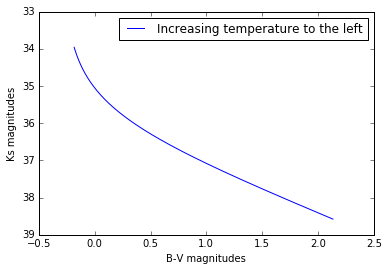

In [57]:
B_minus_V = B_magnitudes - V_magnitudes ## taking the difference between the B and V magnitudes to plot against the Ks magnitudes 

magnitude_plot = plt.plot(B_minus_V, Ks_magnitudes, label='Increasing temperature to the left') ## plotting them against each other, 
plt.ylabel('Ks magnitudes')
plt.xlabel('B-V magnitudes')
plt.gca().invert_yaxis() ## inverting the y-axis to show and increasing temperature
plt.legend(loc='upper right')



### Part 2: The Real Filter

In [34]:
## Goals: multiply by alotted light as a function of wavelength; Effects of Interstellar Extinction; trying to find limits 
## planck flux multiplied by this function, THEN the integral to get a more accurate magnitude  
## Which data to use: J-H vs H-J http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html
## html
## fix the data_mag function 
## Going forward: Plotting color to color (magJ-magH) vs (magH-magK)
## Theory behind Holly's research

In [35]:
##  manually-entered data

## anything with the extension _wav represents wavelengths in microns
## anything with the extension _rsr represents relative spectral response 
## J represents the J-band; H represents the H-band

J_wav = [1.062, 1.066,1.07,1.075,1.078,1.082,1.084,1.087,1.089,1.093,1.096,1.102,1.105,1.107,1.109,
         1.112,1.116,1.117,1.12,1.123,1.128,1.129,1.132,1.134,1.138,1.14,1.143,1.147,1.154,1.159,1.164
         ,1.167,1.17,1.173,1.175,1.179,1.182,1.186,1.188,1.192,1.195,1.199,1.202,1.209,1.216,1.221,1.227,1.231,1.236
         ,1.24,1.244,1.247,1.253,1.255,1.258,1.26,1.265,1.27,1.275,1.279,1.286,1.292,1.297,1.302,1.305,1.307,1.31
         ,1.313,1.316,1.319,1.323,1.326,1.33,1.333,1.334,1.336,1.339,1.343,1.346,1.349,1.353,1.355,1.36,1.363,1.37
         ,1.373,1.377,1.383,1.388,1.392,1.395,1.396,1.397,1.398,1.4,1.401,1.402,1.404,1.406,1.407,1.41,1.412,1.416
         ,1.421,1.426,1.442,1.45]
J_rsr = [0,4.07E-04,1.54E-03,2.67E-03,5.51E-03,1.23E-02,2.03E-02,3.06E-02,4.05E-02,5.15E-02,5.64E-02,7.18E-02
         ,0.273603,0.340997,0.358446,0.380134,0.330668,0.239548,0.250062,0.283301,0.258233,0.251474,0.538119
         ,0.223168,0.536893,0.110203,0.529207,0.26194,0.320155,0.1743,0.607031,0.617933,0.676289,0.72794,0.746531
         ,0.830404,0.790307,0.809605,0.836888,0.835984,0.749936,0.708013,0.698759,0.704854,0.700382,0.732765,0.705725
         ,0.842431,0.921873,0.952505,0.967585,0.959508,0.922697,0.892978,0.852943,0.802308,0.750078,0.678072,0.652417
         ,0.638754,0.642413,0.64856,0.68238,0.752903,0.775942,0.811828,0.777008,0.72103,0.952459,0.855137,0.841401
         ,1,0.894736,0.854912,0.537894,0.279866,0.906532,0.689345,0.553327,0.243177,1.44E-02,1.89E-04,4.01E-02
         ,4.54E-03,3.20E-04,3.72E-02,5.38E-04,0,1.44E-04,3.30E-03,3.14E-04,8.48E-03,2.54E-02,0.118446,1.36E-04
         ,6.10E-05,5.21E-02,1.04E-02,4.78E-02,4.20E-04,2.37E-03,5.26E-03,8.65E-03,7.29E-04,3.48E-04,3.78E-04,0]

H_wav = [1.289,1.315,1.341,1.368,1.397,1.418,1.44,1.462,1.478,1.486,1.493,1.504,1.515,1.528,1.539,1.546,1.551,1.556
         ,1.565,1.572,1.577,1.583,1.592,1.597,1.602,1.613,1.619,1.628,1.633,1.642,1.648,1.657,1.659,1.671,1.684
         ,1.701,1.715,1.727,1.739,1.746,1.751,1.753,1.756,1.764,1.775,1.785,1.79,1.796,1.803,1.81,1.813,1.818,1.828
         ,1.835,1.85,1.871,1.893,1.914]
H_rsr = [0,5.92E-08,1.27E-07,0,0,1.71E-05,5.11E-04,2.77E-03,8.09E-03,2.87E-02,8.71E-02,0.201449,0.438159,0.686357
         ,0.818076,0.882073,0.911825,0.926872,0.929288,0.872747,0.856619,0.882556,0.918084,0.926654,0.907594
         ,0.925974,0.920496,0.924198,0.923533,0.941788,0.949134,0.980658,0.993744,1,0.956052,0.924116,0.98212
         ,0.991589,0.988683,0.979168,0.968184,0.93704,0.918998,0.842264,0.667111,0.269402,0.45163,0.173062,0.107726
         ,7.07E-02,5.11E-03,2.00E-02,3.92E-04,1.53E-06,5.95E-05,0,3.05E-05,0]


In [46]:
## creating a second planck curve that will take in MICRONS as opposed to meters

def planck2(x, T):
    
    h = 6.626e-34 ## J*s
    c = 3.0e+8 ## m/s
    k = 1.38e-23 ## J/K

    a0 = 2.0*h*c**2
    b0 = (h*c)/((x*1e-6)*k*T)
    intensity = a0 / (((x*1e-6)**5) * (np.exp(b0) - 1.0) )
    return intensity

wavelengths = np.arange(1, 3, 1e-3) ## for our new wavelengths IN MICRONS
temperatures = np.arange(2500, 38000, 100) ## for our "T" value in the function; the full range of Main Sequence temps

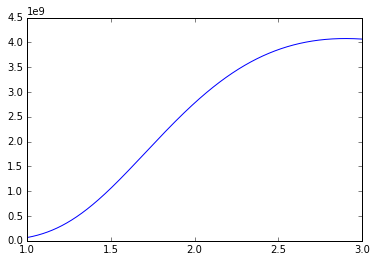

In [47]:
## let's just choose a temperature at which to plot our planck curve

plt.plot(wavelengths, planck2(wavelengths,1000))

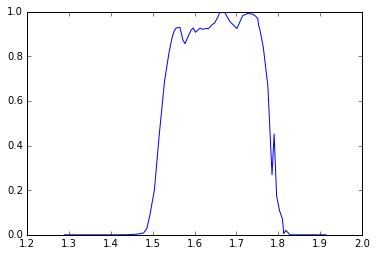

In [37]:
## and here's the relative spectral response against wavelength for the H-band filter 

plt.plot(H_wav, H_rsr)

In [48]:
## this function will multiply our actual data by our blackbody curve, i.e. the two functions seen above 

def planck_and_data(x, y, T):
    
    f = interpolate.interp1d(x, y)   
    
    intensity_array = []
    
    for i in x:
        intensity = (planck2(i, T))*f(i)
        intensity_array = np.append(intensity_array, intensity)

    return intensity_array
    

49090738769.902855

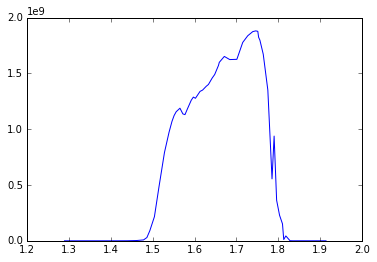

In [49]:
## here are the two curves multiplied together for 1000 K

H = planck_and_data(H_wav, H_rsr, 1000)

plt.plot(H_wav, H)

np.trapz(H)

In [52]:
## this is just me testing out the integral of our new curve

def integral_array(wav, rsr, temperatures):
    
    flux_array = []
    
    for t in temperatures: 
        flux = np.trapz(planck_and_data(wav,rsr,t))   ## trapz takes the integral from a to b, and I called the planck function because that's what we're integrating 
        flux_array = np.append(flux_array, flux)  ## this collects our flux values in an array
    
    return flux_array

H_integral = integral_array(H_wav, H_rsr, temperatures)
print H_integral

[  9.52584703e+12   1.09527968e+13   1.24717653e+13   1.40788732e+13
   1.57701917e+13   1.75418054e+13   1.93898592e+13   2.13105933e+13
   2.33003678e+13   2.53556798e+13   2.74731742e+13   2.96496490e+13
   3.18820583e+13   3.41675111e+13   3.65032690e+13   3.88867422e+13
   4.13154840e+13   4.37871854e+13   4.62996686e+13   4.88508807e+13
   5.14388871e+13   5.40618650e+13   5.67180972e+13   5.94059658e+13
   6.21239463e+13   6.48706022e+13   6.76445791e+13   7.04446004e+13
   7.32694615e+13   7.61180262e+13   7.89892218e+13   8.18820354e+13
   8.47955100e+13   8.77287414e+13   9.06808741e+13   9.36510992e+13
   9.66386507e+13   9.96428034e+13   1.02662870e+14   1.05698200e+14
   1.08748174e+14   1.11812207e+14   1.14889743e+14   1.17980252e+14
   1.21083233e+14   1.24198207e+14   1.27324720e+14   1.30462341e+14
   1.33610657e+14   1.36769276e+14   1.39937824e+14   1.43115944e+14
   1.46303297e+14   1.49499559e+14   1.52704418e+14   1.55917580e+14
   1.59138760e+14   1.62367690e+14

In [41]:
## defining our actual magnitude function
## this time, we're finding the area under our planck_and_data curve for a range of temperatures on the main sequence 

def actual_mag(lambda_eff, halfwidth, F0, wav, rsr, temps):        ## it takes in the following arguments for certain filters
     
    flux_x = F0*2*halfwidth*1e-2                   ## *1e4 to get from /m^-2 to W/m^2; *1e-6 to get the correct wavelengths
    
    flux_array = []                               ## just defining an array to put our calculated fluxes in
    magnitude_array = []                          ## and one for our magnitudes as well 
    
    for t in temperatures: 
        flux = np.trapz(planck_and_data(wav, rsr, t))   ## trapz takes the integral from a to b, and I called the planck_and_data function because that's what we're integrating 
        flux_array = np.append(flux_array, flux)      ## this collects our flux values in an array
        
    for f in flux_array:                          ## iterating through all flux values in our flux array
        magnitude = -2.5*np.log10(f/flux_x)       ## this is the function we want
        magnitude_array = np.append(magnitude_array, magnitude)     ## again calculating 
    
    return magnitude_array

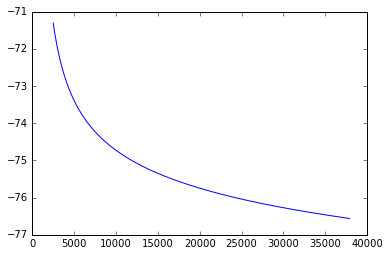

In [44]:
## Let's do this!!!

lambda_eff, halfwidth, F0 = getfilter('H') ## calling the getfliter function to specify filter

H_mag = actual_mag(lambda_eff, halfwidth, F0, H_wav, H_rsr, temperatures) 

plt.plot(temperatures, H_mag)

### Ahhhh It worked!!!!

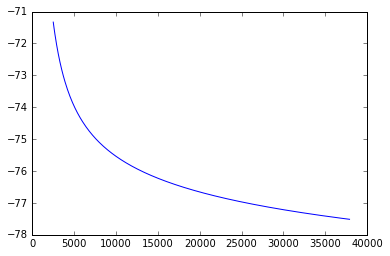

In [53]:
## doing it for the J-band filter

lambda_eff, halfwidth, F0 = getfilter('J') ## calling the getfliter function to specify filter

J_mag = actual_mag(lambda_eff, halfwidth, F0, J_wav, J_rsr, temperatures) 

plt.plot(temperatures, J_mag)

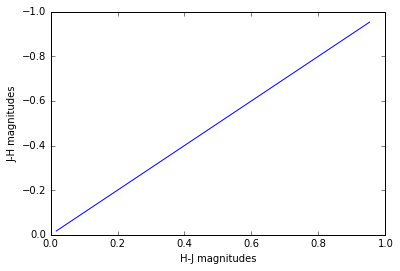

In [58]:
## Hopefully, this is what we wanted

J_minus_H = J_mag - H_mag

H_minus_J = H_mag - J_mag

plt.plot(H_minus_J, J_minus_H)
plt.ylabel('J-H magnitudes')
plt.xlabel('H-J magnitudes')
plt.gca().invert_yaxis() ## inverting the y-axis to show and increasing temperature